**🚨🚨🚨**

> **Brief Description of the Dataset**


*   Dataset name: Disaster Tweets
*   Description: The Disaster Tweets dataset consist of 11370 tweets. They are divided into those which are related to disaster (1) and those which are not (0). The main aim is to classify the tweets to distinguish the ones which report real disasters. The dataset includes five columns (sequenced on the order of importance):

  1.   target: A flag indicating whether the tweet is about a real disaster (1) or not (0).
  2.   text: The original tweets.
  3.   location: The geographical information that the tweet carries.
  4.   keyword: A particular keyword related to that particular tweet.
  5.   id: Unique identifier of a tweet.

*   Source: [*Disaster Tweets Dataset*](https://www.kaggle.com/datasets/vstepanenko/disaster-tweets)
*   Objective: The problem I aim to solve here is the Binary Text Classification on this Disaster Tweets dataset. More specifically, the goal is to analyze a tweet and find out if that tweet is related to a actual disaster or not.





In [ ]:
# Importing necessary libraries (more libraries will be used in coming cells according to needs).
import pandas as pd
import numpy as np

# I. Importing the dataset from Kaggle with the help of API token

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vstepanenko/disaster-tweets

Dataset URL: https://www.kaggle.com/datasets/vstepanenko/disaster-tweets
License(s): CC0-1.0
  0% 0.00/656k [00:00<?, ?B/s]
100% 656k/656k [00:00<00:00, 140MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('disaster-tweets.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# II. Checking encoding of the dataset and reading the dataset

In [ ]:
# This cell of codes particularly checks the encoding of a dataset. When I first started learning ML 4 months ago, I came near of this wonderful helper.
# I was stuck on reading a dataset in common fashion ('x_dataset.csv') and it could not read the data.
# After extensive investigation I found that most of the dataset are encoded in ascii. And the common ('x_dataset.csv') data reading method treats every dataset as ascii by default.
# This is when I found this library 'chardet' which helps me know any dataset's encoding.
# Fun fact, the dataset I was stuck on was encoded in MacRoman.
import chardet

# Detecting the encoding.
with open('tweets.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])

UTF-8-SIG


In [ ]:
tweets=pd.read_csv('tweets.csv', encoding='UTF-8-SIG')
tweets.sample(10) # Displaying 10 random rows to get the maximum understanding of the dataset.

,id,keyword,location,text,target
10873,10873,weapon,NaN,He better have a nuclear weapon too,1
386,386,armageddon,grantabridge,When the few hold the most wealth power and pr...,0
9586,9586,stretcher,23// exo wayv got7 nct21,he flung himself out of the stretcher so he co...,1
4081,4081,detonate,"Croydon, London","Still though, if they'd had the balls to have ...",0
1925,1925,bush%20fires,United States,Linking the bushfire disaster in NSW to climat...,0
6098,6098,hailstorm,nawf carolina,She absolutely does. 🌹,0
3262,3262,debris,Highlands,"Buckets would have been no good for us really,...",0
3817,3817,desolate,United States Air Force,bubby finally gonna help with desolate while i...,0
1394,1394,body%20bagging,inMYBAG 🎒,this one of many reason im body bagging keia a...,0
7072,7072,landslide,NaN,#WhatIllWatchOverAndOverAgain And Over And Ove...,0


# III. Data preparation (Data Visualization and First Check)

In [ ]:
# Display dataset information and initial analysis
print("Dataset Information:")
tweets.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


In [ ]:
# Check for missing values
print(tweets.isnull().sum())

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64




> *The location column has 3418 missing values or NaN rows.*



# IV. Data preprocessing

In [ ]:
# Handling missing values
# Dropping the location column since it is not critical.
tweets.drop(columns=['location'], inplace=True)

In [ ]:
# Cleaning the text column by removing URLs, special characters, and converting to lowercase.
import re

def c_text(text):
    text = re.sub(r'http\S+', '', text)  # Removing URLs.
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing special characters.
    text = text.lower().strip()  # Converting to lowercase and strip whitespace.
    return text

tweets['text'] = tweets['text'].apply(c_text)

In [ ]:
tweets.sample(10)

,id,keyword,text,target
1398,1398,body%20bagging,bunning a blem chill doing trips outta tell ...,0
462,462,arson,i dont know why they hon judges get carried aw...,0
10248,10248,thunderstorm,glorious rain just beautiful rain weather thun...,0
5803,5803,flattened,on clemson has been flattened times trying to...,0
2470,2470,collide,taylorann hasselhoff collide,0
1513,1513,bomb,breaking bomb in van of nj kosher market terro...,1
10759,10759,volcano,for those who would like to extend help to var...,0
11327,11327,wreckage,from identities special issue whiteness and na...,0
4528,4528,drowning,drowning in my own thoughts,0
9951,9951,survivors,did you know that violence against women unaba...,0


In [ ]:
# Replacing '%20' with '_' in the keyword column.
tweets['keyword'] = tweets['keyword'].str.replace('%20', '_')

tweets.sample(10)

,id,keyword,text,target
10073,10073,threat,just so were clear the president ordered a guy...,0
7629,7629,nuclear_disaster,top story disastertsunamiearthquake fukushima ...,0
3813,3813,desolate,let their habitation be desolate and let none ...,0
9817,9817,sunk,we must put aside petty grievances america is ...,0
10007,10007,terrorism,what did you want him to say pass his condolen...,0
6108,6108,hailstorm,take me with you,0
8485,8485,refugees,this is sad people who call themselves christi...,0
10747,10747,violent_storm,stormbrendan has now started to pivot northnor...,1
1096,1096,blight,if needed you might like to refer to work on p...,0
4428,4428,drowned,every pharaoh assigned against you are incapac...,0




> ***NOTICE HERE:*** My first model on this dataset with considerable accuracy, which I was going to submit on 27th January (I did not when I saw the extended deadline. Yes, **this whole work was produced in two days, ALHAMDULILLAH, although long story short, I thought I would opt for Assignment 1 you've given. Even though I have already shortlisted 10 relevant papers with each journal's impact factor no less than 7.5.**) was overfitting. Although I achieved a high accuracy, that model did not perform well on user-given unseen data. But I had to submit it because I was on the brink of the deadline.

But when the deadline extended, I came back again to inspect it and understood I did not even give a close look to the dataset other than cleaning it! It was always a lot of 0s and a few 1s. Our current target column! I noticed it every time, but did not 'notice' as well!

Class imbalance, and this is what was obstructing me. That said, I took care of it!



In [ ]:
tweets['target'].value_counts() # Clear class imbalance on the target column (about 4:1 ratio). We addressed it with assigning more class weights to the minority class (1) in the loss function (coming in on in the later codes).

,count
target,
0,9256
1,2114


In [ ]:
# Splitting the dataset into features and target
X = tweets.drop('target', axis=1)  # Drop the target column for features
y = tweets['target']  # Extract the target column

# Displaying the shapes to confirm.
print("Features (X) Shape:", X.shape)
print("Target (y) Shape:", y.shape)

Features (X) Shape: (11370, 3)
Target (y) Shape: (11370,)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets.
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (9096, 3)
Testing Features Shape: (2274, 3)
Training Target Shape: (9096,)
Testing Target Shape: (2274,)


# V. Vectorization, Encoding, and Feature Engineering of the * cleaned * dataset

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Step 1: Dropping the id column.
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

In [ ]:
# Step 2: TF-IDF Vectorization for text column with bigrams.
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))  # Bigrams
X_train_text = tfidf_vectorizer.fit_transform(X_train['text']).toarray()
X_test_text = tfidf_vectorizer.transform(X_test['text']).toarray()

In [ ]:
# Step 3: One-Hot Encoding for keyword column.
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_keyword = ohe.fit_transform(X_train[['keyword']])
X_test_keyword = ohe.transform(X_test[['keyword']])

In [ ]:
# Step 4: Combining text and keyword features.
X_train_final = np.hstack((X_train_text, X_train_keyword))
X_test_final = np.hstack((X_test_text, X_test_keyword))

In [ ]:
# Displaying the shapes of final datasets.
print("Final Training Features Shape:", X_train_final.shape)
print("Final Testing Features Shape:", X_test_final.shape)

Final Training Features Shape: (9096, 10219)
Final Testing Features Shape: (2274, 10219)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculating class weights.
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Created dictionary for easier access to class weights later.
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
class_weights_dict

{0: 0.6141961970613656, 1: 2.6892147587511825}



> ***Enormous*** imbalance between two classes.



# VI. As I chose BERT pre-trained model for my work I manually installed a needed library 'transformers' which is not built-in in Google Colab (I took the help of ChatGPT here)

In [ ]:
!pip uninstall -y datasets fsspec gcsfs

Found existing installation: fsspec 2024.10.0
Uninstalling fsspec-2024.10.0:
  Successfully uninstalled fsspec-2024.10.0
Found existing installation: gcsfs 2024.10.0
Uninstalling gcsfs-2024.10.0:
  Successfully uninstalled gcsfs-2024.10.0


In [ ]:
!pip install transformers datasets fsspec==2024.6.1 gcsfs==2024.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00


In [ ]:
!pip show datasets transformers fsspec gcsfs

Name: datasets
Version: 3.2.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: aiohttp, dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: 
---
Name: transformers
Version: 4.47.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 

# VII. Tokenizing the dataset

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

In [ ]:
# Step 1: Preparing data for Hugging Face (Hugging Face, Inc. is the author of transformers library and, it comes real handy when tokenizing).
# Merging text and keyword into a single column for tokenization.
X_train['input_text'] = X_train['keyword'] + " " + X_train['text']
X_test['input_text'] = X_test['keyword'] + " " + X_test['text']

In [ ]:
# Converting to Hugging Face dataset format.
train_dataset = Dataset.from_dict({'text': X_train['input_text'].tolist(), 'label': y_train.tolist()})
test_dataset = Dataset.from_dict({'text': X_test['input_text'].tolist(), 'label': y_test.tolist()})

In [ ]:
# Step 2: Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/9096 [00:00<?, ? examples/s]

Map:   0%|          | 0/2274 [00:00<?, ? examples/s]

In [ ]:
# Set dataset format for PyTorch.
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# VIII. Loading the pre-trained model

In [ ]:
# Explicitly moving the model to GPU because PyTorch requires it (I do not know if it does in everywhere such as in local machine. But it surely does in Google Colab if I recall my experience of past 4 months).
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
class_weights_tensor = torch.tensor([class_weights_dict[0], class_weights_dict[1]], dtype=torch.float)

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device) # Moving model to the GPU.

# Moving class weights to the same device as the model.
class_weights_tensor = class_weights_tensor.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# IX. Model training

In [ ]:
from transformers import EarlyStoppingCallback # Using early stopping to prevent overfitting.

In [ ]:
# Building the model with fine-tuned hyperparameters.
history = TrainingArguments(
    output_dir="./results",            # TrainingArguments requires it.
    per_device_train_batch_size=16,    # 'per_device_train_batch_size' is the fixed parameter of transformers library.
    per_device_eval_batch_size=16,     # Do.
    num_train_epochs=50,               # Do and I set epochs to 50.
    learning_rate=2e-5,                # Do and this Learning Rate is the best possible I found.
    weight_decay=0.01,                 ### I used weight decay for regularization to prevent overfitting along with early stopping. I used a combined effort of class weights and weight decay to bring up the fruit of my work. You can say I wanted to investigate and ALHAMDULILLAH, the result was satisfying.###
    load_best_model_at_end=True,       # 'load_best_model_at_end' is the fixed parameter of transformers library and for unknown reason, must be included.
    metric_for_best_model="eval_loss", # Do.
    evaluation_strategy="epoch",       # Do.
    save_strategy="epoch",             # Do.
    report_to="none",                  # Do.
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(




> ***NOTICE HERE:*** This is where the actual work has been done. I assigned uniformal (means higher to minority class in proportional manner) class weights to the both classes in the loss function ***CrossEntropyLoss***.



In [ ]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
# Compiling the model with Trainer.
trainer = CustomTrainer(
    model=model,
    args=history,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]  # I set early stopping patience to 5.
)

<ipython-input-56-f98b58e652e0>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(




> There is no **'model.compile()'** here because the Hugging Face Trainer handles the optimizer, loss, and the training loop according to our training arguments. This kind of abstraction makes the fine-tuning process easier despite still giving us the ability to customize callbacks or evaluation metrics when needed.




> *I took considerable help of **ChatGPT** here.*



In [ ]:
import torch.nn as nn

In [ ]:
# Training the model.
trainer.train()

# Saving the model.
trainer.save_model("./final_bert_model")
tokenizer.save_pretrained("./final_bert_model")  # Saving the tokenizer as well.

Epoch,Training Loss,Validation Loss
1,0.287300,0.272226
2,0.195700,0.263769
3,0.118100,0.477884
4,0.079300,0.429914
5,0.048800,0.429272
6,0.030700,0.456938
7,0.029800,0.578842


('./final_bert_model/tokenizer_config.json',
 './final_bert_model/special_tokens_map.json',
 './final_bert_model/vocab.txt',
 './final_bert_model/added_tokens.json')

# X. Model evaluation

In [ ]:
## ChatGPT-generated codes ##

# Predict on the test dataset
predictions = trainer.predict(test_dataset)

# Extract the predicted labels
y_pred = predictions.predictions.argmax(axis=1)

# If you have the true labels for the test dataset, you can evaluate:
y_true = [label for label in test_dataset['label']]  # Replace 'label' with the actual label column name if different

# Evaluate the performance
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1878
           1       0.75      0.75      0.75       396

    accuracy                           0.91      2274
   macro avg       0.85      0.85      0.85      2274
weighted avg       0.91      0.91      0.91      2274





> Points worth to be noted after assessing the classification report.



*   **Accuracy of my *Binary Text Classification* model is 91% (well, matrices biased towards majority class can be resolved by oversampling the minority class I think).**
*   **Macro average is balanced across classes.**



# XI. Visualizing the Confusion Matrix with respect to instructions

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

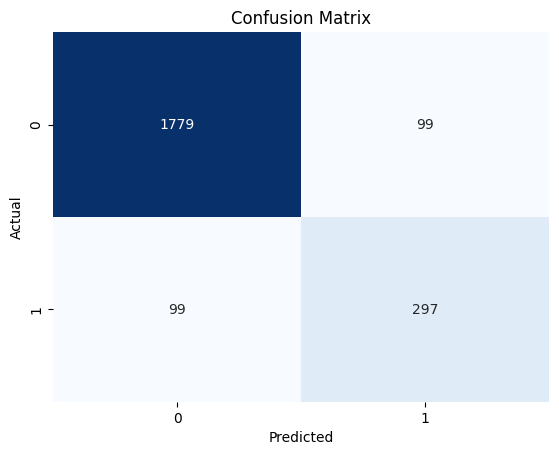

In [ ]:
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



> **Insights and Conclusion**


*   **Key challenges faced during preprocessing or model development:** Challenges I faced during preprocessing were mostly missing data, unnecessary or noisy data, special characters, and class imbalance. As for model development, the prime challenge was overcoming overfitting. [I have shed light on these factors throughout this notebook by including comments and text cells.]
*   **Performance insights:** Accuracy is 91% on the test dataset and the model can give predictions on real-world unseen data exceptionally well (the performance was 100% accurate when checking on 10 sample examples).
*   **Potential areas for improvement:** Oversampling the minority class may reduce the bias towards the majority class seen in the classification report. I did not work on this to include this in future work (this section).





# 🌟 ***BONUS:*** Testing the model on user-given data.

In [ ]:
## ChatGPT-generated codes ##

import torch

# Function to predict if a sentence is disaster-related
def predict_disaster(input_text, model, tokenizer, labels=["Not Disaster", "Disaster"]):
    """
    Preprocesses the input text, predicts using the trained model, and returns the label.

    Args:
        input_text (str): The user-provided text.
        model: The fine-tuned BERT model.
        tokenizer: The tokenizer used during model training.
        labels (list): List of class labels (default is ["Not Disaster", "Disaster"]).

    Returns:
        str: Predicted label for the input text.
    """
    # Preprocess the input text
    encodings = tokenizer(input_text, truncation=True, padding=True, max_length=128, return_tensors="pt")
    encodings = {key: val.to(model.device) for key, val in encodings.items()}  # Move to device (CPU/GPU)

    # Predict using the model
    with torch.no_grad():
        outputs = model(**encodings)
        prediction = outputs.logits.argmax(dim=1).item()  # Get predicted class (0 or 1)

    # Map the prediction to the label
    return labels[prediction]

# Example usage
while True:
    user_input = input("Enter a sentence (or type 'exit' to stop): ")
    if user_input.lower() == "exit":
        print("Exiting the prediction system. Goodbye!")
        break

    prediction = predict_disaster(user_input, model, tokenizer)
    print(f"Prediction: {prediction}")

Enter a sentence (or type 'exit' to stop): Emergency services are struggling to control the rapidly growing wildfire in the national park.
Prediction: Disaster
Enter a sentence (or type 'exit' to stop): My friend’s wedding is coming up this weekend, I’m so excited to celebrate with them.
Prediction: Not Disaster
Enter a sentence (or type 'exit' to stop): The weather is nice and calm today, perfect for a walk in the park.
Prediction: Not Disaster
Enter a sentence (or type 'exit' to stop): I’ve been trying new smoothie recipes for a healthy breakfast.
Prediction: Not Disaster
Enter a sentence (or type 'exit' to stop): An avalanche has struck a ski resort, rescuers are digging through the snow to find survivors.
Prediction: Disaster
Enter a sentence (or type 'exit' to stop): I’ve just booked a flight to Paris for next month, excited for the trip!
Prediction: Not Disaster
Enter a sentence (or type 'exit' to stop): A tsunami caused massive destruction in the coastal city, thousands are fear



> **Concluding statement:** The model still has good room for improvement but AGAIN, these test examples here, **ALL WERE GENERATED BY ChatGPT AT MY REQUEST OF ***REAL-WORLD USER-GIVEN UNSEEN DATA* **, PREDICTED THE PREDICTION 🌟100%🌟 accurately!**



> *I took help from ChatGPT after my work was done to standardize the look of the codes.*



**THANK YOU VERY MUCH FOR TAKING YOUR TIME TO EVALUATE MY SUBMISSION AND CANDIDACY. ASSALAMUALAIKUM.**



                                                                  ...**THE END**...